In [1]:
from astropy.table import Table
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 14

# read csv

In [2]:
table_croom = pd.read_csv('croom2005.csv', index_col=0)
table_ross = pd.read_csv('ross2009.csv', index_col=0)
table_myers = pd.read_csv('myers2007.csv', index_col=0)
table_laurent = pd.read_csv('laurent2017.csv', index_col=0)

mytable = pd.read_csv('bq_autocross.csv', index_col=0)
table_auto = pd.read_csv('bq_auto.csv', index_col=0)
table_cross = pd.read_csv('bq_cross.csv', index_col=0)

table_bq = pd.read_csv('bq.csv', index_col=0)

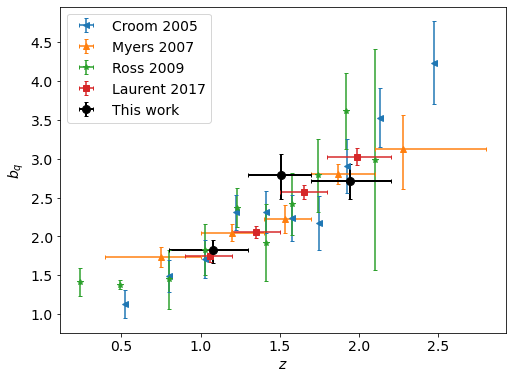

In [3]:
kwargs = {
    'capsize': 2
}
diff_args = [
    {'fmt': '<', 'label': 'Croom 2005'}, 
    {'fmt': '^', 'label': 'Myers 2007'},
    {'fmt': '*', 'label': 'Ross 2009'},
    {'fmt': 's', 'label': 'Laurent 2017'},
    {'fmt': 'o', 'label': 'This work', 'color': 'black', 'linewidth': 2, 'markersize': 8}
]
tables = [table_croom, table_myers, table_ross, table_laurent, mytable]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

for t, arg in zip(tables, diff_args):
    ax.errorbar(t['z'], t['bq'], np.vstack((t['bq_l'], t['bq_u'])), np.vstack((t['z'] - t['z_l'], t['z_u'] - t['z'])), **arg, **kwargs)
plt.legend()
ax.set_xlabel(r'$z$')
ax.set_ylabel('$b_q$')

plt.savefig('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/figure/z-bq.pdf')

In [8]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as mpatches
import numpy as np

# Define a square
square = [
    (-1, -1),
    (1, -1),
    (1, 1),
    (-1, 1),
    (-1, -1),
]

# Define a circle (parametric points)
theta = np.linspace(0, 2*np.pi, 40)
circle = np.column_stack([1*np.cos(theta), 1*np.sin(theta)])

# Combine into one Path (square outline + circle)
vertices = np.concatenate([square, circle])
codes = (
    [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY] +
    [Path.MOVETO] + [Path.LINETO]*(len(circle)-1)
)
marker_path = Path(vertices, codes)

# # Use the Path as a marker
# plt.plot(
#     [0, 1, 2], [0, 1, 0],
#     marker=marker_path,
#     markersize=20,
#     linestyle='--',
#     color='tab:blue',
#     markerfacecolor='none'
# )

# plt.gca().set_aspect('equal')
# plt.show()


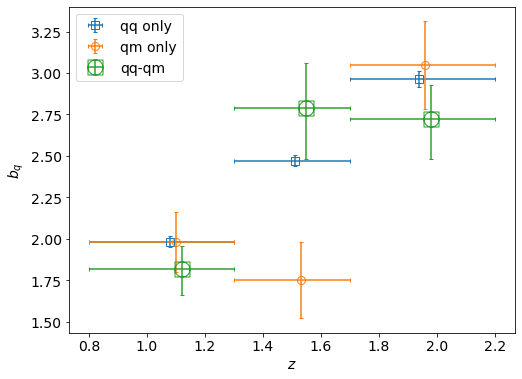

In [11]:
kwargs = {
    'capsize': 2
}

diff_args = [
    {'fmt': 's', 'label': 'qq only', 'markersize': 8, 'markerfacecolor': 'none'}, 
    {'fmt': 'o', 'label': 'qm only', 'markersize': 8, 'markerfacecolor': 'none'},
    {'marker': marker_path, 'label': 'qq-qm', 'markersize': 15, 'markerfacecolor': 'none', 'linestyle': 'None'}
    # {'fmt': '*', 'label': 'qq-qm', 'markersize': 20, 'markerfacecolor': 'none'}
]

tables = [table_auto, table_cross, mytable]
offset = 0

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

for t, arg in zip(tables, diff_args):
    centre = t['z'] + offset
    ax.errorbar(centre, t['bq'], np.vstack((t['bq_l'], t['bq_u'])), np.vstack((centre - t['z_l'], t['z_u'] - centre)), **arg, **kwargs)
    offset += 0.02

ax.legend()
ax.set_xlabel(r'$z$')
ax.set_ylabel('$b_q$')
plt.savefig('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/figure/z-bqs.pdf')

In [22]:
for i in range(len(table_bq)):
    row = table_bq.iloc[i]
    print(row.name, \
          '${:.2f}^{{+{:.2f}}}_{{-{:.2f}}}$'.format(row['bq_a'], row['er1'], row['er2']),\
          '${:.2f}^{{+{:.2f}}}_{{-{:.2f}}}$'.format(row['bq_c'], row['er3'], row['er4']), sep='&')

total&$2.47^{+0.02}_{-0.02}$&$2.20^{+0.13}_{-0.13}$
high&$2.50^{+0.04}_{-0.04}$&$2.30^{+0.17}_{-0.17}$
low&$2.40^{+0.04}_{-0.04}$&$2.06^{+0.16}_{-0.17}$
z1&$1.98^{+0.03}_{-0.03}$&$1.98^{+0.18}_{-0.18}$
z2&$2.47^{+0.04}_{-0.04}$&$1.75^{+0.23}_{-0.23}$
z3&$2.96^{+0.05}_{-0.05}$&$3.05^{+0.26}_{-0.27}$
